# *Movie Status Report: Computing Vision*
### I.- Introduction
#### A) Overview
    We have been tasked with determining which type of movie would be the best investment for a new movie studio. Based on empirical data collected over the past couple of years. We want your initial investment in a movie to be successful so you can hit the ground running in your new and exciting venture. For that to be a success, we have taken a deep dive into the data to determine how long a movie should be, what rating, and how much to spend to insure a hit in the box office.
#### B) Members
    1. Blake Medwed
    2. Rico Gutierrez
    3. Ahmed Isse
    4. Alberto Ruiz Martinez
#### C) Objectives
    1. Analyze empirical data based on the last few years
    2. Visualize the analyzed data
    3. Explain the vizualizations
    4. Determine the best course of action for the initial investment

### ll.- Determining Data
#### A) What production metrics makes a movie successful?
    1. Runtime - How long a movie lasts
    2. Age Rating - The age bracket and potential age restrictions determined by the MPAA
    3. Movie Budget - The amount invested in film production
#### B) What metrics are affected by production?
    1. Domestic gross - Gross revenue made released within a country
    2. Foreign gross - Gross revenue made by the movie outside of the origin country
    3. Worldwide gross - Gross revenue made by the movie worldwide
    4. Box Office - The amount of money raised by ticket sales
    5. Popularity Rating - How high would an audience rate a movie
#### C) Where does the data come from?
    1. Box Office Mojo - Domestic gross, foreign gross, release year
    2. Rotten Tomatoes - MPAA rating, runtime, box office
    3. The Movie Database - Popularity rating, average popularity vote
    4. The Numbers - Production budget, domestic gross, worldwide gross

### llI.- Cleaning and Modifying Data
###### A) Importing data into dataframes and respective libraries

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz', index_col=0)
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep = '\t', encoding='windows-1252')
rt_movies = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep = '\t', encoding='windows-1252')
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=7)
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=2)

##### B) Removing data that would potentially skew results
    1. Non applicable data
    2. Data containing synonymous values like zero

In [216]:
bom_movies.dropna(inplace=True)
rt_movies.dropna(inplace=True)

##### C) Change data types
    1. Changing a string into a manageable integer type

In [217]:

rt_movies['box_office'] = rt_movies['box_office'].str.replace(',', '')
rt_movies['box_office'] = rt_movies['box_office'].astype(int)

##### D) Merging dataframes 
    1. Increases population for metrics such as gross revenue
    2. Decreasing columns based on what information is valuable

In [218]:
df = pd.merge(bom_movies, tmdb, on = 'title')
df = df[['studio', 'domestic_gross', 'foreign_gross', 'year', 'popularity', 'vote_average']]
tn.index.name = 'title'
df = df.merge(tn, on='title', how='left' )
df.sort_index()

,studio,domestic_gross_x,foreign_gross,year,popularity,vote_average,id,release_date,production_budget,domestic_gross_y,worldwide_gross
title,,,,,,,,,,,
'71,RAtt.,1300000.0,355000,2015,10.523,6.8,NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,17.892,6.9,54.0,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
11-11-11,Rocket,32800.0,5700000,2011,5.196,4.3,NaN,NaN,NaN,NaN,NaN
12 Strong,WB,45800000.0,21600000,2018,13.183,5.6,64.0,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"
12 Years a Slave,FoxS,56700000.0,131100000,2013,16.493,7.9,18.0,"Oct 18, 2013","$20,000,000","$56,671,993","$181,025,343"
...,...,...,...,...,...,...,...,...,...,...,...
Zero Dark Thirty,Sony,95700000.0,37100000,2012,14.239,6.9,66.0,"Dec 19, 2012","$52,500,000","$95,720,716","$134,612,435"
Zookeeper,Sony,80400000.0,89500000,2011,10.764,5.3,71.0,"Jul 8, 2011","$80,000,000","$80,360,866","$170,805,525"
Zoolander 2,Par.,28800000.0,27900000,2016,12.997,4.7,64.0,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693"


##### D) Further formatting
    1. Removing Duplicate columns
    2. Removing Nan values again
    3.Converting values

In [219]:
#Removing duplicate columns
df = df.drop('domestic_gross_y', axis=1)
df = df.drop('release_date', axis=1)

#Removing Nan
df.dropna(inplace=True)

#Formatting and convertting values
pd.to_datetime(df.year, format='%Y')

df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].astype(int)

df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].astype(int)

df.drop_duplicates(inplace=True)
df= df.rename(columns={'domestic_gross_x':'domestic_gross'})

df.head()

,studio,domestic_gross,foreign_gross,year,popularity,vote_average,id,production_budget,worldwide_gross
title,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,47.0,200000000,1068879522
Inception,WB,292600000.0,535700000,2010,27.920,8.3,38.0,160000000,835524642
Shrek Forever After,P/DW,238700000.0,513900000,2010,15.041,6.1,27.0,165000000,756244673
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,20.340,6.0,53.0,68000000,706102828
Iron Man 2,Par.,312400000.0,311500000,2010,28.515,6.8,15.0,170000000,621156389


### IV.- Analyzing Data

##### A 1.1)  Analyzing MPAA Age Rating: Graphing

In [220]:
#Calculating how much average box office each rating made
ratings_df = rt_movies.groupby(by='rating').mean().sort_values(by=['box_office'], ascending=False)
ratings_df.drop(['id'], inplace=True, axis = 1)
ratings_df.reset_index(inplace=True)
ratings_df.head()

,rating,box_office
0,PG-13,6.872359e+07
1,PG,5.289280e+07
2,R,2.394827e+07
3,G,7.402788e+06
4,NC17,1.260219e+06


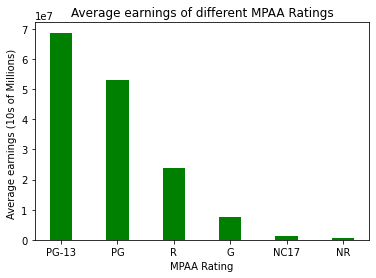

In [221]:
#Graphing
x = ratings_df.rating
y = ratings_df.box_office
plt.bar(x, y, color ='green',
        width = 0.4)
 
plt.xlabel("MPAA Rating")
plt.ylabel("Average earnings (10s of Millions) ")
plt.title("Average earnings of different MPAA Ratings")
plt.show()

##### A 1.2) Analyzing Movie Runtime: Conclusions
    1. The biggest standout for recommending earnings are PG-13 and PG movies
    2. It would make sense because R rated movies are only accessible to adults
    3. The average earnings is used to avoid total earnings in case there are an abundance of certain ratings
    4. The average earnings made by a PG-13 movie is SUBSTANTIALLY HIGHER than that made with any other rating

##### A 1.3) Analyzing Movie Runtime: T-test Graphing
    1. We are comparing a sample mean with a population mean, 1 sample t-test
    2. We are trying to determing if the sample is making more than the population, 1 tail t-test
    3. We are trying to look for a 95% significance level, alpha = .05
    4. The null hypothesis would be that a PG-13 movie does not significantly increase revenue

In [222]:
population_df = rt_movies[["rating", "box_office"]]
population_df.reset_index(inplace=True)
population_df = population_df.drop("index", axis=1)
population_df.head()

,rating,box_office
0,R,600000
1,PG-13,41032915
2,R,224114
3,R,1039869
4,PG-13,20518224


In [223]:
population_df['rating'].value_counts()

R        105
PG-13     77
PG        38
NR         9
G          5
NC17       1
Name: rating, dtype: int64

In [224]:
sample_df = population_df[population_df['rating'] == "PG-13"]
sample_df.reset_index(inplace=True)
sample_df = sample_df.drop("index", axis=1)
sample_df.head()

,rating,box_office
0,PG-13,41032915
1,PG-13,20518224
2,PG-13,35565975
3,PG-13,42929971
4,PG-13,37431431


In [225]:
sample_df['rating'].value_counts()

PG-13    77
Name: rating, dtype: int64

In [226]:
degrees = len(sample_df)-1
t_crit = stats.t.ppf(1 - 0.025, degrees)
t_crit 

1.9916726093523487

In [227]:
population_mean = population_df["box_office"].mean()
results = stats.ttest_1samp(
    a       = list(sample_df["box_office"]),
    popmean = population_mean
)

t = results.statistic
results

Ttest_1sampResult(statistic=3.120504262968141, pvalue=0.0025520497727060543)

##### A 1.4) Analyzing Movie Runtime: T-test Conclusions
    1. The observed t-statistic > the critical t value
    2. Null Hypothesis is rejected
    3. The increase in box office sales is statistically significant with a 97.5% confidence

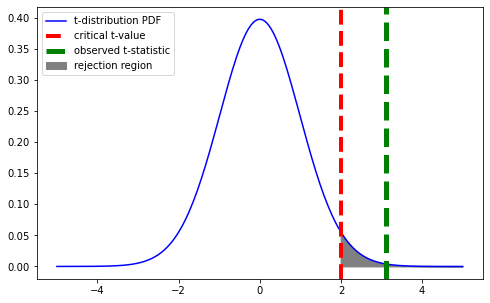

In [228]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))
x = np.linspace(-5, 5, 200)
y = stats.t.pdf(x, degrees, 0, 1)
# Plot the PDF as a line graph
# (x and y were created in previous plotting code)
ax.plot(x, y, color='blue', label="t-distribution PDF")

# Graphing Critical t-value
ax.axvline(t_crit,color='red',linestyle='--',lw=4,label='critical t-value')

# Filling Rejection Region
ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")

#Graphing observed t-stat
ax.axvline(t, color='green', linestyle='--', lw=5,label='observed t-statistic')

#Graphing legend
ax.legend();

##### B 1.1) Analyzing Movie Budget: Cleaning
    1. We want to analyze movies that have a high earning of at least 400,000,000 dollars
    2. We need to analyze the studio, the production budget, and the worldwide gross.
    3. A stacked bar chart will depict the budget a studio allocates and how much revenue they recieve
    3. Some studios have are in the dataset multiple times but under a different name

In [229]:
df.head()

,studio,domestic_gross,foreign_gross,year,popularity,vote_average,id,production_budget,worldwide_gross
title,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,47.0,200000000,1068879522
Inception,WB,292600000.0,535700000,2010,27.920,8.3,38.0,160000000,835524642
Shrek Forever After,P/DW,238700000.0,513900000,2010,15.041,6.1,27.0,165000000,756244673
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,20.340,6.0,53.0,68000000,706102828
Iron Man 2,Par.,312400000.0,311500000,2010,28.515,6.8,15.0,170000000,621156389


In [230]:
movie_budget_df = df[df['worldwide_gross'] > 400000000]
movie_budget_df = movie_budget_df[['production_budget', 'worldwide_gross', 'studio']].groupby(by='studio').sum().sort_values(by=['production_budget'], ascending=False)
movie_budget_df.reset_index(inplace=True)
movie_budget_df

,studio,production_budget,worldwide_gross
0,BV,6.831200e+09,3.176650e+10
1,WB,3.271000e+09,1.324274e+10
2,Fox,2.937000e+09,1.378231e+10
3,Uni.,1.974000e+09,1.440055e+10
4,Sony,1.440000e+09,6.862027e+09
5,Par.,1.394000e+09,4.907887e+09
6,P/DW,9.500000e+08,4.341653e+09
7,WB (NL),8.950000e+08,4.076665e+09
8,LGF,4.950000e+08,2.958353e+09
9,Wein.,1.000000e+08,4.499483e+08


In [231]:
#Combigning duplicate entries under LG and WB
movie_budget_df['studio'] = movie_budget_df['studio'].replace('^WB.*', 'WB', regex=True)
movie_budget_df['studio'] = movie_budget_df['studio'].replace('^LG.*', 'LG', regex=True)
movie_budget_df

,studio,production_budget,worldwide_gross
0,BV,6.831200e+09,3.176650e+10
1,WB,3.271000e+09,1.324274e+10
2,Fox,2.937000e+09,1.378231e+10
3,Uni.,1.974000e+09,1.440055e+10
4,Sony,1.440000e+09,6.862027e+09
5,Par.,1.394000e+09,4.907887e+09
6,P/DW,9.500000e+08,4.341653e+09
7,WB,8.950000e+08,4.076665e+09
8,LG,4.950000e+08,2.958353e+09
9,Wein.,1.000000e+08,4.499483e+08


In [232]:
movie_budget_df = movie_budget_df.groupby(movie_budget_df["studio"], sort=False).sum()
movie_budget_df

,production_budget,worldwide_gross
studio,,
BV,6.831200e+09,3.176650e+10
WB,4.166000e+09,1.731940e+10
Fox,2.937000e+09,1.378231e+10
Uni.,1.974000e+09,1.440055e+10
Sony,1.440000e+09,6.862027e+09
Par.,1.394000e+09,4.907887e+09
P/DW,9.500000e+08,4.341653e+09
LG,5.150000e+08,3.384705e+09
Wein.,1.000000e+08,4.499483e+08


In [233]:
#Our X-Values will be the studios
x = list(movie_budget_df.index)

#We need 2 bars to make a stacked bar chart. The revenue will on average be greater than the expense.
#Because of this, we will graph the expense on top of the revenue
revenue_y = movie_budget_df.groupby(by = 'studio').mean().sort_values(by=['worldwide_gross'], ascending=False)['worldwide_gross']
expense_y = movie_budget_df.groupby(by = 'studio').mean().sort_values(by=['production_budget'], ascending=False)['production_budget']
 

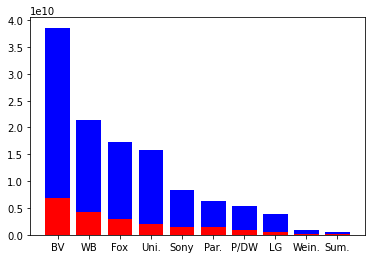

In [234]:
plt.bar(x, expense_y, color='r')
plt.bar(x, revenue_y, bottom=expense_y, color='b')
plt.show()

##### B 1.2) Analyzing Movie Budget: Conclusions
    1. We are comparing the budgets vs the expenses
    2. Studios with more potential expenses, would be expected to have more return on revenue
    3. A further step would be to determine the marginal returns for every dollar invested to determine an optimal budget

##### C 1.1) Analyzing Movie Runtime: Graphing

In [235]:
runtime_df = rt_movies[['runtime', "box_office"]]
runtime_df['runtime'] = rt_movies['runtime'].str[:-8].astype(int)
runtime_df['Long'] = np.where(runtime_df['runtime']> 107, 'Y', 'N')

<ipython-input-235-20a045845f64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_df['runtime'] = rt_movies['runtime'].str[:-8].astype(int)
<ipython-input-235-20a045845f64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_df['Long'] = np.where(runtime_df['runtime']> 107, 'Y', 'N')


In [236]:
#Determining what makes a movie long
runtime_df

,runtime,box_office,Long
1,108,600000,Y
6,82,41032915,N
7,123,224114,Y
15,108,1039869,Y
18,127,20518224,Y
...,...,...,...
1530,126,72700000,Y
1537,123,1320005,Y
1541,119,25335935,Y
1542,129,1416189,Y


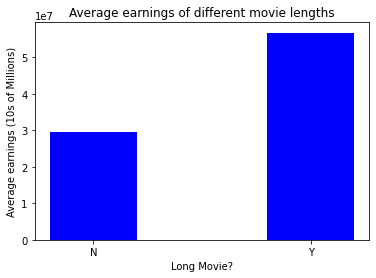

In [237]:

#The Average
runtime_df = runtime_df.groupby(by = 'Long').mean()
runtime_df.reset_index(inplace=True)

y = runtime_df.box_office
x = runtime_df.Long

plt.bar(x, y, color ='blue', width = 0.4)

plt.xlabel("Long Movie?")
plt.ylabel("Average earnings (10s of Millions)")
plt.title("Average earnings of different movie lengths")
plt.show()

##### C 1.2) Analyzing Movie Runtime: Conclusions
    1. The average length of a movie was determined to be 107 minutes
    2. Anything above 107 would be considered long, anything below would be short
    3. The average earnings is used to avoid total earnings in case there are an abundance of long or short movies
    4. The average earnings made by a long movie is SUBSTANTIALLY HIGHER than that made with a short movie

### V.- Further Steps
##### A) Age Rating
    1. We would recommend a targeted age rating of PG-13 or equivalent for other countries.
    2. Avoid ratings that would restrict a potential viewerbase
    
##### B) Runtime
    1. A longer movie on average would also increase potential revenue
    2. The industry standard is 90 minutes, this is further evidence that a longer runtime is better
    
##### C) Funding
    1. Movies with higher production budgets will also return greater revenue
    2. It is important to to secure funding from investors
    